# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
    </ol>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [29]:
Train_data

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
0,K0460000001363,34 Year(s),Male,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,0
1,K0460000001680,43 Year(s),Male,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,0
2,K0460000001680,43 Year(s),Male,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,0
3,K0460000000106,28 Year(s),Male,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,0
4,K0460000000150,42 Year(s),Male,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,0
...,...,...,...,...,...,...,...,...,...,...
22911,K0400002457330,13 Year(s),Male,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,0
22912,K0400002459565,20 Year(s),Male,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,0
22913,K0400002461645,21 Year(s),Male,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,0
22914,K04ACE21027742,45 Year(s),Female,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,0


# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [4]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [5]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

In [ ]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name','last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

missing_cols(airbnb)

## **3.3-Dropping the row**

If you want to remove rows, you do so using dropna . I’m not going to do that because there are no missing values in price.

In [ ]:
# remove rows with missing values in price
airbnb['price'].dropna(inplace=True)

# **4-Convert target variable into binary Form**

In [8]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem**


## **5.1 Check Imbalanced Problem in Data**

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **5.2 Data resample**

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

#**6- Missing Values** 

## **6.1 Why do We Need to Fill Missing Values in a Dataset?**

Sometimes the dataset we use to solve a problem contains a lot of missing values that can adversely affect the performance of a machine learning model. A dataset with a lot of missing values can give us wrong information. So if we have missing values in a dataset, here are some strategies we can choose to deal with them:

- Removing the whole row which contains missing values
- Filling the missing values according to the other known values

The first strategy is to remove the entire row containing a missing value. This is not a bad idea, but it can only be considered when the data is very large. If removing missing values results in a data shortage, then this will not be an ideal dataset for any data science task. This is where the second strategy comes in, which is to fill in the missing values according to the other known values. This strategy can be considered in any type of dataset.

So this is why we need to fill the missing values in a dataset. In the section below, I will take you through a tutorial on how to fill in missing values in a dataset using Python.


## **6.2- Check missing Value**

In [11]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


If you want to see missing values for all columns, use this command:

In [ ]:
oversampled.isnull().sum()


This gives you the percentage of missing values in each of the columns. Knowing the percentage can be useful in determining whether you should drop the column.

In [13]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))

In [14]:
perc_missing(oversampled)


REPORT_VERIFIED => 1.75%


**Heatmap of missing values**

Heatmaps are also useful to visualize your missing values, in particular at which point of the data do missing values exists.

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(oversampled.isnull(), yticklabels=False, cmap='viridis', cbar=False)

## **6.3 Fill Missing Values in a Dataset using Python**

The scikit-learn library in Python offers the **SimpleImputer()** class which can be used for filling the missing values based on:

- Mean of the known values
- Median of the known values
- Most frequent value among the known values

So let’s go through all these methods one by one for filling the missing values of a dataset. I will first create a very simple dataset with some missing values:


In [ ]:
import numpy as np
data = np.array([[10, np.nan, 8], 
                 [9, 8, np.nan], 
                 [7, 10, 9]])

In [ ]:
print(data)


[[10. nan  8.]
 [ 9.  8. nan]
 [ 7. 10.  9.]]


Here is how you can use the Mean of the other known values for filling the missing values:



In [ ]:
# Filling Values with mean
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
data1 = mean_values.fit_transform(data)

In [ ]:
print(data1)


[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


Here is how you can use the Median of the other known values for filling the missing values:



In [ ]:
# Filling Values with median
from sklearn.impute import SimpleImputer
median_values = SimpleImputer(strategy='median')
data2 = median_values.fit_transform(data)
print(data2)

[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


Here is how you can use the most frequent value among the other known values for filling the missing values:

In [ ]:
# Filling values with most frequent values
from sklearn.impute import SimpleImputer
most_frequent = SimpleImputer(strategy='most_frequent')
data3 = most_frequent.fit_transform(data)
print(data3)

[[10.  8.  8.]
 [ 9.  8.  8.]
 [ 7. 10.  9.]]


**Imputing**

For imputing, there are 3 main techniques shown below.

- fillna — filling in null values based on given value (mean, median, mode, or specified value)
- bfill / ffill — stands for backward fill and forward fill (filling in missing values based on the value after or before the column.)
- Simple Imputer — Sk-learn’s built-in function that imputes missing values (commonly used alongside a pipeline when building ML models)

Below you can find examples of applying these methods to the price column if it had missing values.

In [ ]:
# imputing price with mean
price_mean_value = round(airbnb['price'].mean(), 2)
airbnb['price'].fillna(price_mean_value, inplace=True)

# imputing price with median
price_median_value = round(airbnb['price'].median(), 2)
airbnb['price'].fillna(price_median_value, inplace=True)

# imputing with bfill or ffill
airbnb['price'].bfill(inplace=True)
airbnb['price'].ffill(inplace=True)

# imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb[['price']] = imr.fit_transform(airbnb[['price']])

**Replace**

To replace values, the fillna function is also used.

You define the value you want to replace in the key, and the substitute in the value — {column_name: replacement_for_NA}

Here are examples for replacing values in the columns reviews_per_month and name


In [ ]:
# replace null values in reviews_per_month with 0 
airbnb.fillna({'reviews_per_month':0}, inplace=True)

missing_cols(airbnb)

In [ ]:
# replace null values in name with 'None'
airbnb.fillna({'name':'None'}, inplace=True)

missing_cols(airbnb)

# **7-Inconsistent data/Irrelevant features**

Inconsistent data refers to things like spelling errors in your data, column names that are not relevant to the data, the wrong data type, etc.
Here are a couple examples for dealing with these issues.

**Remove rows based on regex**


Let’s say you want to remove rows that contain a certain word. For my example, I chose the word noisy/Noisy as my target, and I used the function str.contains() to find the indexes that contain those rows.

Then, using the drop function, and setting axis to index, I can supply the indexes I have and drop those rows.
Printing out the number of rows, you can see it reduced by three.

In [ ]:
# example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb[airbnb['name'].str.contains(target, regex=True)]

# show rows that contains the word noisy
print(noisy_airbnb['name'])

# get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

# print(index_to_drop)

In [ ]:
# drop rows based on index
airbnb.drop(index_to_drop, axis='index', inplace=True)

print(len(airbnb_ori))
print(len(airbnb))

**Spelling errors in categorical data**


Sometimes your categorical data might have spelling errors or different capitalization that can mess up your categorization.

I will be using the neighbourhood_group column as an example.

In [ ]:
airbnb['neighbourhood_group'].value_counts()

You can see the different types of neighborhoods are already well categorized. But what if it wasn’t?

To simulate a scenario where some of the data had capitalization or spelling issues, I sampled 2 rows from the data, and replaced them with the wrong spelling.

You can see now how the categorization is messed up. “Manhattan” and “manhatann” refer to the same thing, but they aren’t in the same category because of capitalization. Same goes for “brookln” due to spelling issues.

We can fix this by using the replace function in pandas. We first give the values that are wrong, then supply the right ones. Notice the values have to match each other in the list, i.e. “manhatann” → “Manhattan”.

In [ ]:
random_index = airbnb.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()

In [ ]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb['neighbourhood_group'].value_counts()

**Renaming columns**


There are cases where you want to rename your columns as well.

You can do this by using a dictionary, setting the key as the original column name, and the value as the new column name.

Then using the rename function we give our dictionary and voila, the columns names have changed.

In [ ]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb.rename(columns=new_names, inplace=True)
airbnb.head()

**Converting to DateTime**

If you have data that should be a datetime object, but are strings, you can use the pd.to_datetime, and pass it the format that represents your data.

Just like that, the column has converted into a datatime data type.

In [ ]:
airbnb_ori['last_review'] = pd.to_datetime(airbnb_ori['last_review'], format='%Y-%m-%d')
airbnb_ori['last_review'].dtype.type

**Duplicates**


There are cases where your rows have duplicate values, this could’ve happened due to some mishaps in your data collection.

To find out if you have duplicated values, call duplicated().any() on your data frame, and if it’s true, use the drop_duplicates function

You can also specify columns where you want to remove duplicate values like below.

In [ ]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()
False

**Change data type to reduce memory**


Changing data type is common if you want to reduce memory usage.

To do so, you can use the astype(‘dtype’) function where you specify the dtype you want.

In my example, I changed the data type for the host_id column from int64 to int32

Observe the memory before changing the data type

In [ ]:
airbnb.info()

In [ ]:
airbnb['host_id'] = airbnb['host_id'].astype('int32')
airbnb.info()

You can see the memory reduced from 6.5+ to 6.3+ MB.

# **8-Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns


In [19]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [20]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [21]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# **9-Outlier detection**

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

You can also plot a histogram and look at the distribution of your data.

In this histogram, you can see that most of the data is around 0 to 5000.

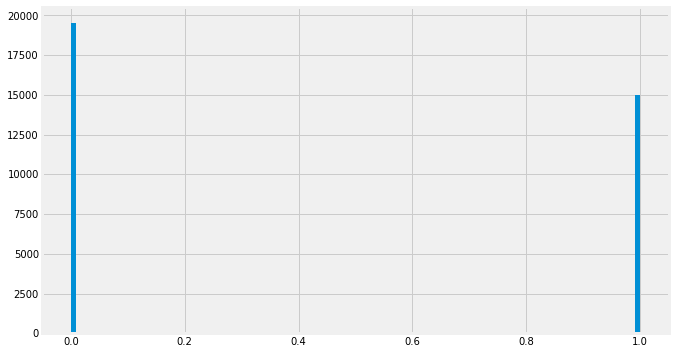

In [30]:
plt.figure(figsize=(10, 6))
MiceImputed['RESULT_TEXT'].hist(bins=100)

A boxplot is also useful in detecting outliers.

As you can see, the price column has multiple data points that are outliers (above of the maximum in the boxplot)

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed.boxplot(column=['RESULT_TEXT'])

For categorical data, you can plot a bar chart to see whether a particular category to view the count of the categories.

Outliers in categorical data is tricky, because you have to determine whether it’s appropriate to call it an outlier based on context.

Some outliers are more obvious. Let’s say there’s an experiment done where 1000 people choose between a glass of water and a glass of milk. If the final result is 1 person who chose a glass of water, and 999 people choosing a glass of milk, that 1 person can be considered an outlier.

However, in some cases, outliers depend on context. In my example, you see that Manhattan and Brooklyn has significantly more data than Staten Island. This doesn’t count as an outlier, since Manhattan and Brooklyn has a higher housing density as compared to Staten Island.

In [32]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


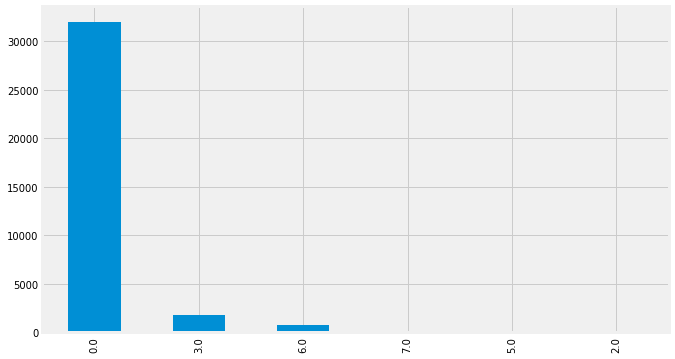

In [33]:
plt.figure(figsize=(10, 6))
MiceImputed['DISTRICT'].value_counts().plot.bar()

**Dealing with outliers**

Dealing with outliers is similar to removing missing values, the only difference is the way you find outliers.

To categorize numerical values as outliers, there are statistical techniques like using the standard deviation and the Interquartile range. You can refer to this article for code examples to do that.

For categorical values, if they have very low frequency (like Staten island in the example above), it still may become a problem for your model. Depending on context and nature of the data, you can choose to group them into one category, for example “Others”. This way your model will be less biased and you’re not losing any information.

# **10- Data spliting**

In [25]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [26]:
y=MiceImputed[['RESULT_TEXT']]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **References**

[Fill Missing Values in a Dataset using Python](https://thecleverprogrammer.com/2021/05/29/fill-missing-values-in-a-dataset-using-python/)

[Data Cleaning with Python](https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45)